Write a program to implement linear regression without using python libraries. (Use student dataset - https://www.kaggle.com/datasets/shubham47/students-score-dataset-linear-regression
)

Data Loading

In [1]:
import pandas as pd

# Load CSV file
df = pd.read_csv("D:\B tech\Semester 5\ML\Practicals\dataset\student_scores.csv")

# Show first 5 rows
print(df.head())


<>:4: SyntaxWarning: invalid escape sequence '\B'
<>:4: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Mehak\AppData\Local\Temp\ipykernel_10840\838350989.py:4: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv("D:\B tech\Semester 5\ML\Practicals\dataset\student_scores.csv")


   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [2]:
print("\n🔹 Basic Info:")
print(df.info())


🔹 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None


In [3]:
print("\n🔹 Shape (rows, columns):")
print(df.shape)


🔹 Shape (rows, columns):
(25, 2)


In [4]:
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Percentage of missing values
print("\n🔹 Missing Values (%):")
print(df.isnull().mean()*100)

df.isnull().sum().sort_values(ascending=False)



🔹 Missing Values:
Hours     0
Scores    0
dtype: int64

🔹 Missing Values (%):
Hours     0.0
Scores    0.0
dtype: float64


Hours     0
Scores    0
dtype: int64

In [5]:
print("\n🔹 Duplicate Rows:")
print(df.duplicated().sum())


🔹 Duplicate Rows:
0


In [6]:
# 6. Summary stats (numerical)
# --------------------------
print("\n🔹 Summary Statistics:")
print(df.describe())

# --------------------------
# 8. Check data types
# --------------------------
print("\n🔹 Data Types:")
print(df.dtypes)


🔹 Summary Statistics:
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

🔹 Data Types:
Hours     float64
Scores      int64
dtype: object


Scatter Plot (Hours vs Scores)

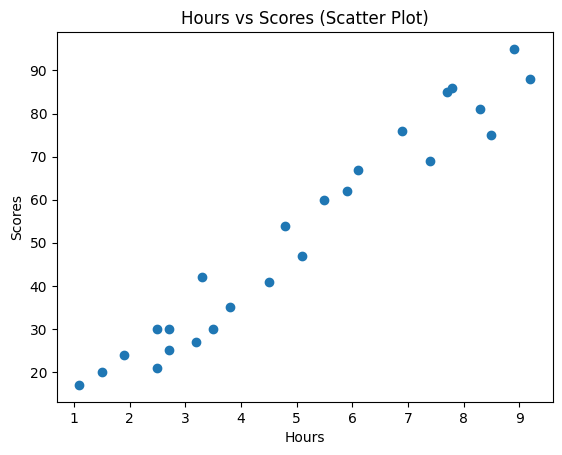

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

plt.scatter(df['Hours'], df['Scores'])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores (Scatter Plot)")
plt.show()


Histogram (Distribution of Hours)

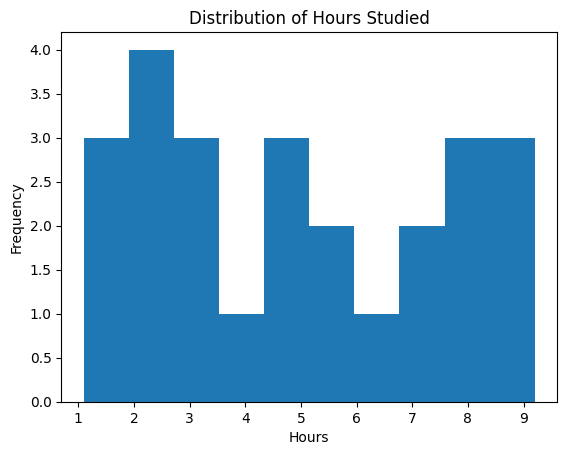

In [9]:
plt.hist(df['Hours'])
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Distribution of Hours Studied")
plt.show()


Histogram (Distribution of Scores)

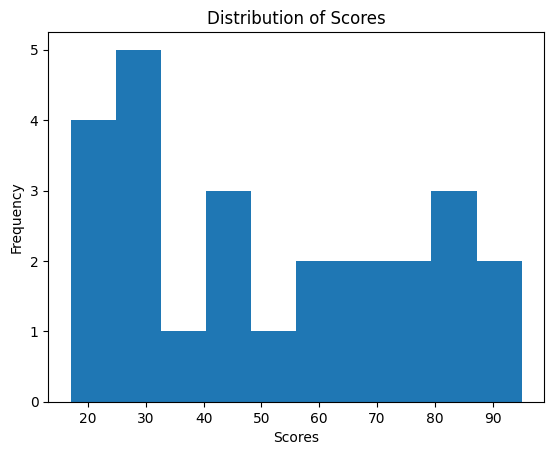

In [10]:
plt.hist(df['Scores'])
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.title("Distribution of Scores")
plt.show()


Box Plot (to check outliers)

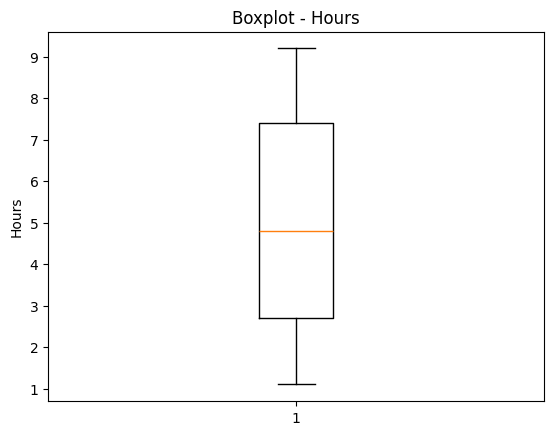

In [11]:
#Hours Boxplot
plt.boxplot(df['Hours'])
plt.title("Boxplot - Hours")
plt.ylabel("Hours")
plt.show()


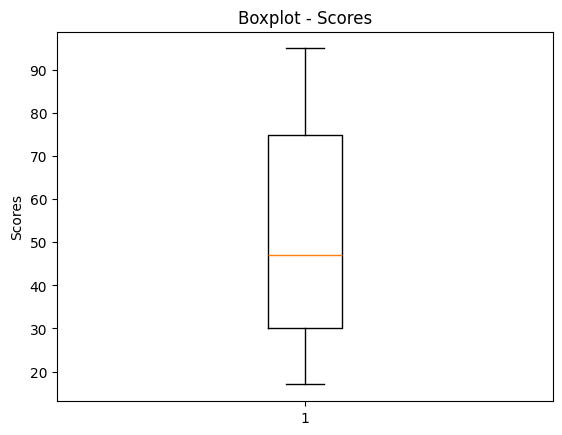

In [12]:
#Scores Boxplot
plt.boxplot(df['Scores'])
plt.title("Boxplot - Scores")
plt.ylabel("Scores")
plt.show()


In [13]:
# Extract X and Y
X = df['Hours'].tolist()
Y = df['Scores'].tolist()

In [14]:
 # Train / Validation / Test Split (60/20/20)
# ---------------------------------------------------
n = len(X)
train_end = int(0.6 * n)
val_end = int(0.8 * n)

X_train = X[:train_end]
Y_train = Y[:train_end]

X_val = X[train_end:val_end]
Y_val = Y[train_end:val_end]

X_test = X[val_end:]
Y_test = Y[val_end:]

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))


Train size: 15
Validation size: 5
Test size: 5


Linear Regression

In [15]:
def mean(values):
    return sum(values) / len(values)

mean_x = mean(X_train)
mean_y = mean(Y_train)

numerator = 0
denominator = 0

for i in range(len(X_train)):
    numerator += (X_train[i] - mean_x) * (Y_train[i] - mean_y)
    denominator += (X_train[i] - mean_x)**2

m = numerator / denominator   # slope
c = mean_y - m * mean_x       # intercept

print("\nSlope (m):", m)
print("Intercept (c):", c)
print(f"Model: y = {m:.3f}x + {c:.3f}")


Slope (m): 9.4212274268318
Intercept (c): 2.530734103646303
Model: y = 9.421x + 2.531


In [16]:
 #Predict Function
# ---------------------------------------------------
def predict(x):
    return m * x + c

In [17]:
# Evaluation Metrics (from scratch)
# ---------------------------------------------------
def mse(y_true, y_pred):
    return sum((y_true[i] - y_pred[i])**2 for i in range(len(y_true))) / len(y_true)

def rmse(y_true, y_pred):
    return mse(y_true, y_pred) ** 0.5

def mae(y_true, y_pred):
    return sum(abs(y_true[i] - y_pred[i]) for i in range(len(y_true))) / len(y_true)

def r2_score(y_true, y_pred):
    mean_y = mean(y_true)
    ss_total = sum((y - mean_y)**2 for y in y_true)
    ss_res = sum((y_true[i] - y_pred[i])**2 for i in range(len(y_true)))
    return 1 - (ss_res / ss_total)

In [18]:
# ---------------------------------------------------
# STEP 6: Evaluate on Validation Set
# ---------------------------------------------------
val_pred = [predict(x) for x in X_val]

print("\n📌 Validation Metrics:")
print("MSE :", mse(Y_val, val_pred))
print("RMSE:", rmse(Y_val, val_pred))
print("MAE :", mae(Y_val, val_pred))
print("R²  :", r2_score(Y_val, val_pred))



📌 Validation Metrics:
MSE : 32.38587972177154
RMSE: 5.690859313124121
MAE : 5.270613713415899
R²  : 0.9538136341674679


Predict on Test Set

In [19]:
print("\nPredictions:")
for i in range(len(X_test)):
    print(f"Actual: {Y_test[i]}, Predicted: {predict(X_test[i])}")



Predictions:
Actual: 30, Predicted: 27.968048156092166
Actual: 54, Predicted: 47.752625752438945
Actual: 35, Predicted: 38.33139832560714
Actual: 76, Predicted: 67.53720334878574
Actual: 86, Predicted: 76.01630803293435


In [20]:
# ---------------------------------------------------
# STEP 7: Evaluate on Test Set
# ---------------------------------------------------
test_pred = [predict(x) for x in X_test]

print("\n📌 Test Metrics:")
print("MSE :", mse(Y_test, test_pred))
print("RMSE:", rmse(Y_test, test_pred))
print("MAE :", mae(Y_test, test_pred))
print("R²  :", r2_score(Y_test, test_pred))


📌 Test Metrics:
MSE : 45.10995210839243
RMSE: 6.716394278807076
MAE : 6.011442607071189
R²  : 0.9068284201330296


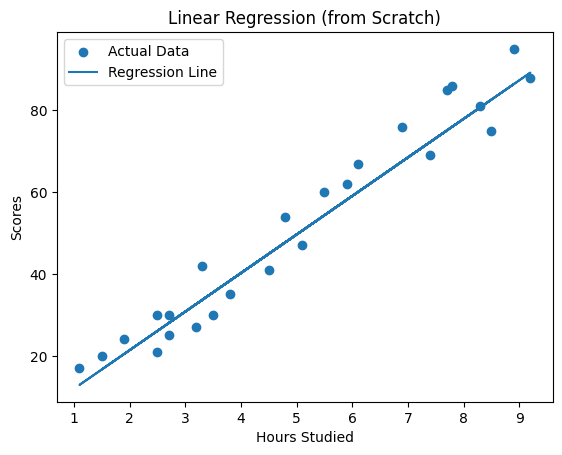

In [21]:
import matplotlib.pyplot as plt

# Create regression line values
x_line = X  # all X values from dataset
y_line = [m * x + c for x in x_line]

# Plot scatter points
plt.scatter(X, Y, label="Actual Data")

# Plot regression line
plt.plot(x_line, y_line, label="Regression Line")

plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Linear Regression (from Scratch)")
plt.legend()

plt.show()

#🔵 Blue Dots → Your real dataset
#🔴 Orange Line → Your predicted linear regression line